In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist


Training data shape: (60000, 28, 28)
Test labels shape: (10000,)
Sample image array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39

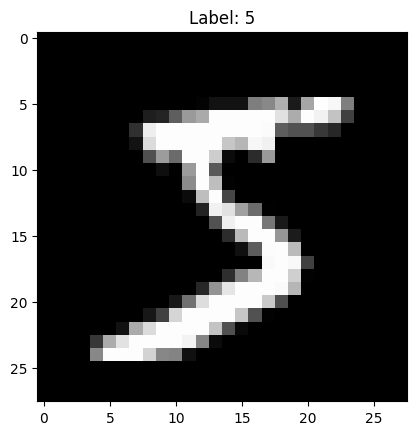

In [26]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test labels shape:", y_test.shape)
print("Sample image array:\n", x_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [27]:
# Normalizing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [28]:
# One-hot encode labels
print(f"Before encoding label 100: {y_train[100]}")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"After encoding label 100: {y_train[100]}")


Before encoding label 100: 5
After encoding label 100: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [34]:
# Model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [35]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Train model (added validation split)
result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9116 - loss: 0.3147 - val_accuracy: 0.9622 - val_loss: 0.1421
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9594 - loss: 0.1409 - val_accuracy: 0.9710 - val_loss: 0.1074
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9710 - loss: 0.0996 - val_accuracy: 0.9750 - val_loss: 0.0959
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9781 - loss: 0.0749 - val_accuracy: 0.9767 - val_loss: 0.0904
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9825 - loss: 0.0595 - val_accuracy: 0.9763 - val_loss: 0.0826
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9777 - val_loss: 0.0822
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0392 - val_accuracy: 0.9812 - val_loss: 0.0697
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9908 - loss: 0.0325 - val_accuracy: 0.